In [2]:
# skelearn imports
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

# pandas and numpy imports
import numpy as np
import pandas as pd

# plotting libraries 
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

# import seaborn
import seaborn as sns

# import knee detection algorithm
from kneed import KneeLocator

sns.set_theme()

In [3]:
# load dataset
iris_dataset = load_iris()

iris_df = pd.DataFrame(data=iris_dataset['data'],
                       columns=iris_dataset['feature_names'])

# Add label to the iris dataframe
iris_df['label'] = iris_dataset['target_names'][iris_dataset['target']]

# drop virginica feature
iris_df = iris_df[iris_df['label'] != 'virginica']

# Just keep two features
iris_df = iris_df.filter(items=['petal length (cm)',
                          'petal width (cm)',
                          'label'])

iris_df.head()

,petal length (cm),petal width (cm),label
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


Text(0.5, 1.0, 'Raw values')

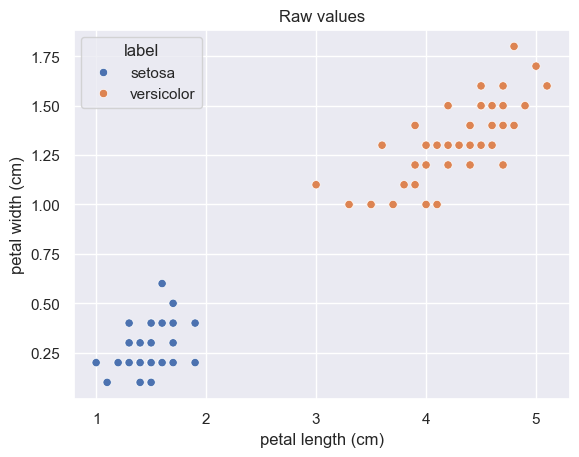

In [4]:
sns.scatterplot(data=iris_df,
                x='petal length (cm)',
                y='petal width (cm)',
                hue = 'label')

plt.title("Raw values")

### Selecting optimal number of clusters

In [5]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

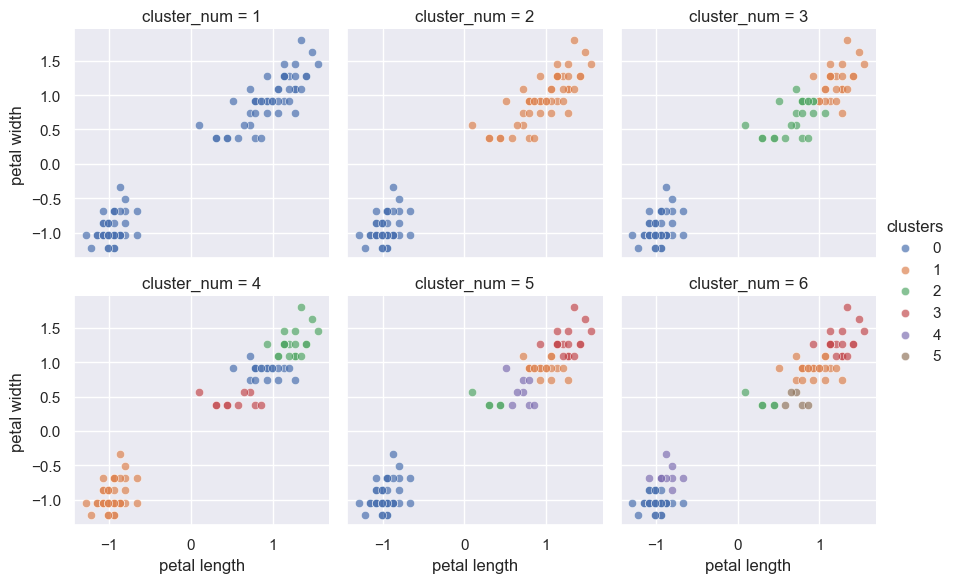

In [6]:
# list of k values
num_clusters = [1, 2, 3, 4, 5, 6]

# list for inertia values
inertia_val = []

# list for cluster result 
cluster_result_list = []

cluster_data = iris_df[['petal length (cm)', 'petal width (cm)']]

# transform the data
standatdscaler = StandardScaler()
cluster_data = standatdscaler.fit_transform(cluster_data)
cluster_data = pd.DataFrame(data=cluster_data,
                            columns=['petal length', 'petal width'])


# get the cluster result and inertia values
for cluster_num in num_clusters:

    # calculate the kmeans
    kmeans = KMeans(n_clusters=cluster_num,
                    n_init='auto')
    kmeans.fit(cluster_data)

    # append the inertia value
    inertia_val.append(kmeans.inertia_)

    # get the cluster result
    cluster_list = cluster_data.copy()
    cluster_list['clusters'] = kmeans.labels_
    cluster_list['cluster_num'] = cluster_num
    cluster_result_list.append(cluster_list)

# concatinate all the cluster result in single list
merge_cluster_result = pd.concat(cluster_result_list,
                                 axis=0,
                                 ignore_index=True)

# plot all clustering
g = sns.FacetGrid(merge_cluster_result,
                  col='cluster_num',
                  col_wrap=3,
                  hue='clusters')

g.map(sns.scatterplot,
      'petal length',
      'petal width',
      alpha=0.7
      )
g.add_legend()

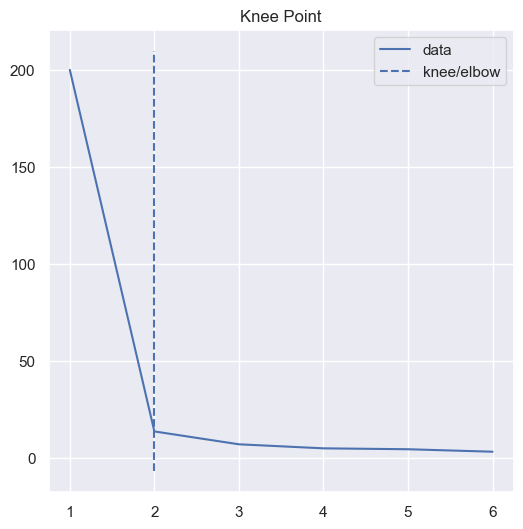

In [7]:
kneedle = KneeLocator(num_clusters,
                      inertia_val,
                      curve='convex',
                      direction='decreasing'
)

kneedle.plot_knee()

### Selecting optimal number of clusters - Silhouette

c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

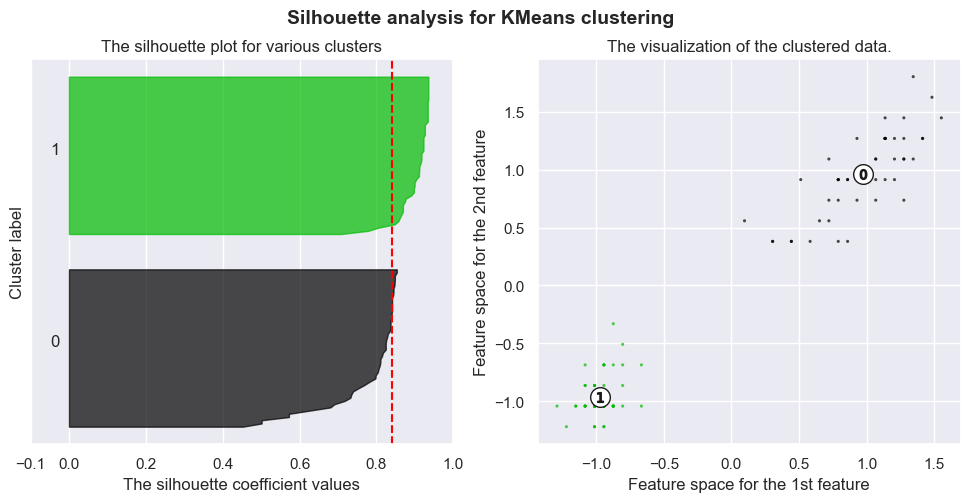

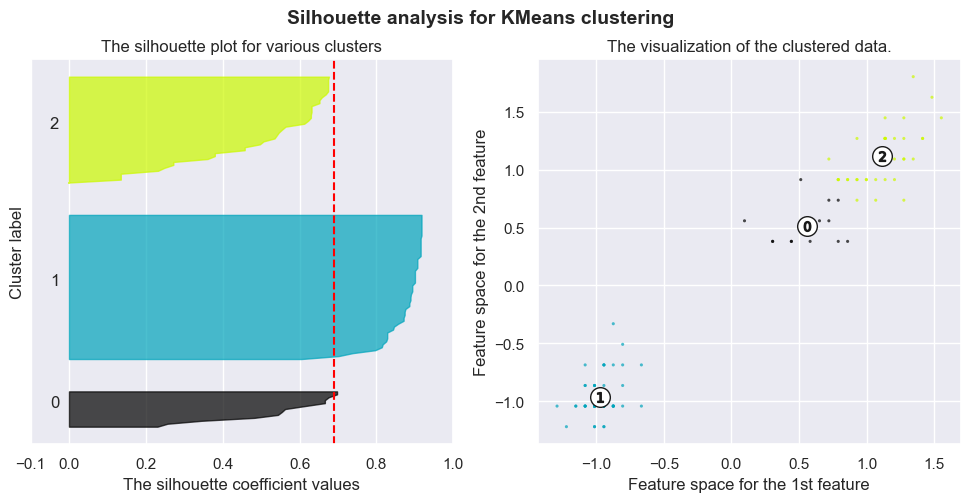

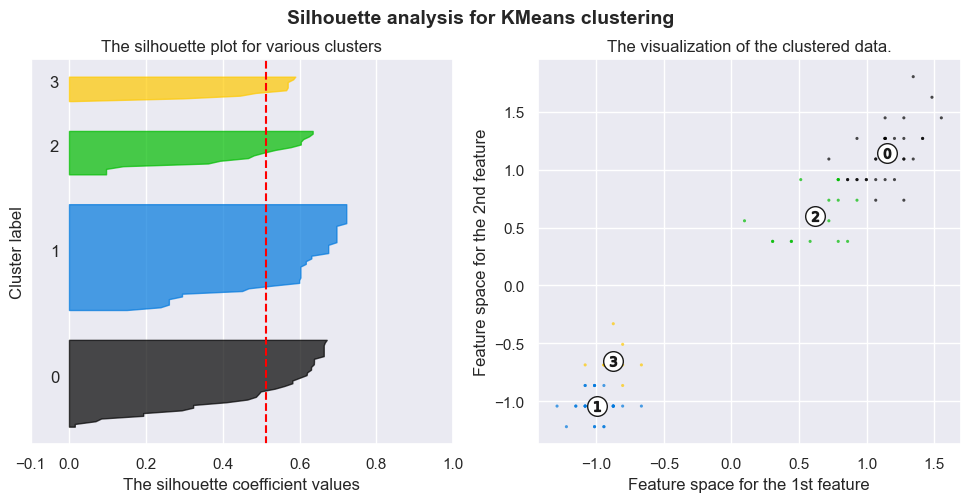

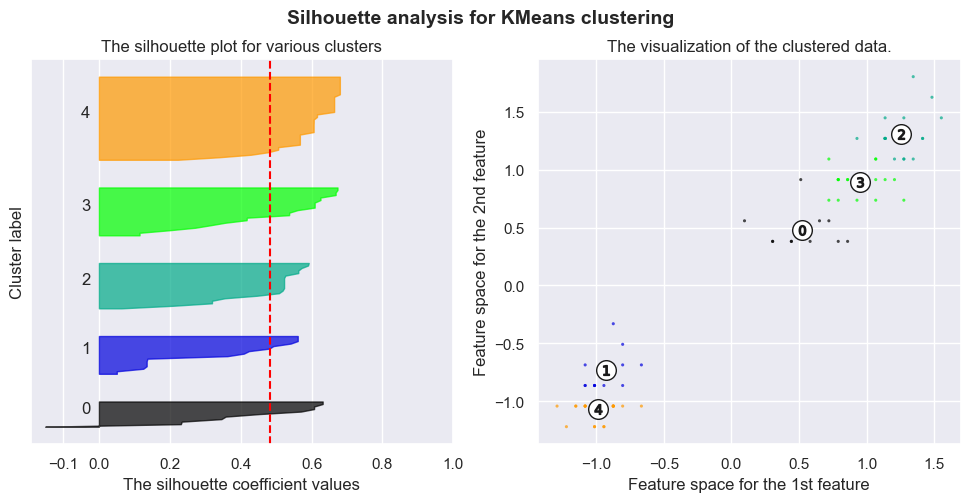

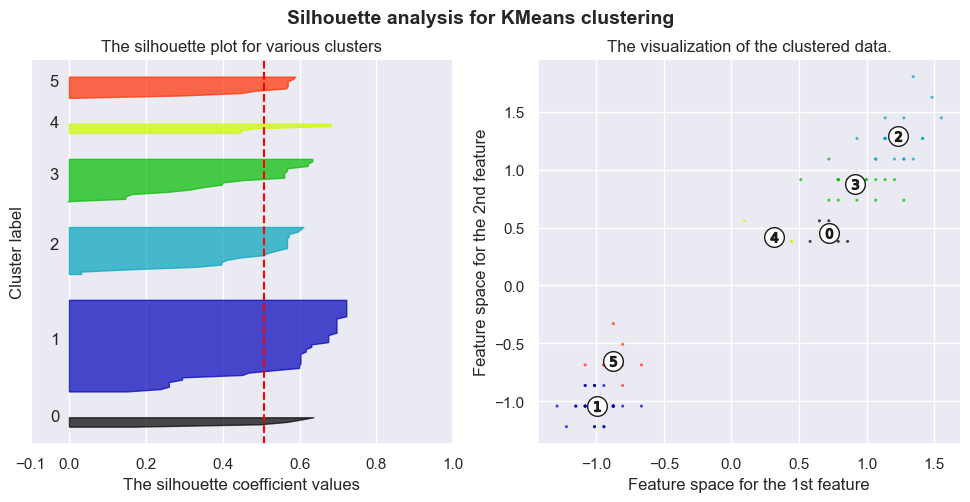

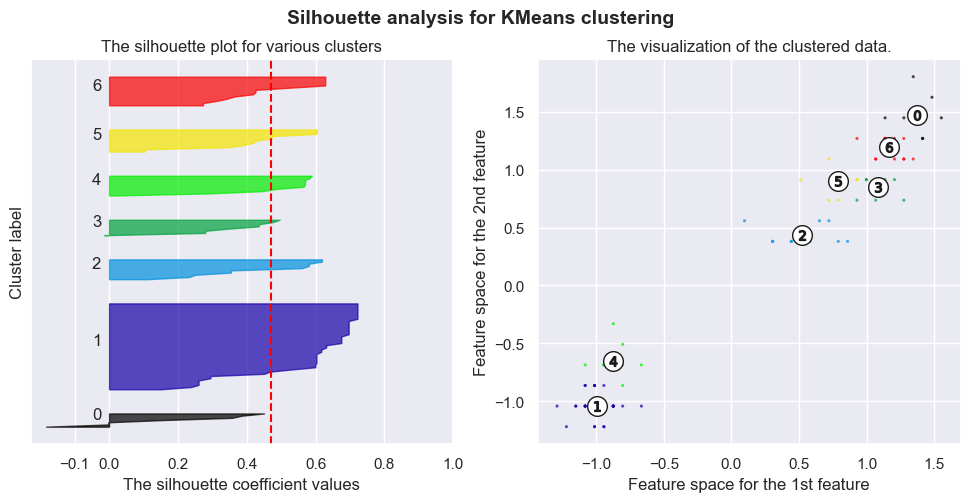

In [8]:
# Set up multiple values of k
num_clusters = [2, 3, 4, 5, 6, 7]

# lists storing results
silhouette_score_list = []

cluster_data = iris_df[['petal length (cm)', 'petal width (cm)']]

# Standardise the data
standard_scaler = StandardScaler()
cluster_data = standard_scaler.fit_transform(cluster_data)
cluster_data = pd.DataFrame(data=cluster_data,
                            columns=['petal length (cm)', 'petal width (cm)'])

# Perform clustering for multiple resolution

# set lower value of y for first silhouette 
y_lower = 10

for n_clust in num_clusters:

    # calculate the kmeans
    kmeans = KMeans(n_clusters=n_clust, n_init='auto')
    kmeans.fit(cluster_data)

    silhouettescore = silhouette_score(cluster_data, kmeans.labels_)
    silhouette_score_list.append(silhouettescore)
    silhouetteSample = silhouette_samples(cluster_data, kmeans.labels_)

    # plot clustering in silhouette
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))


    # plot silhouette scores for points belonging to each clusters
    for clust_i in range(n_clust):

        # Get points belonging to current cluster
        ith_cluster_silhouette_values = silhouetteSample[
            kmeans.labels_ == clust_i
        ]

        # sort points by silhouette values
        ith_cluster_silhouette_values.sort()

        # get size of current cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]

        # get the upper value off y
        y_upper = y_lower + size_cluster_i

        # fill values with y_upper and y_lower with silhouette score values
        # for data
        color = cm.nipy_spectral(float(clust_i)/n_clust)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )

        # Label the silhouette plots with their cluster numbers
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(clust_i))

        # compute the y_lower for next iteration
        y_lower = y_upper + 10

    # set title and label of silhouette plot
    ax1.set_title("The silhouette plot for various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # the verticle line for average silhouette score
    ax1.axvline(x=silhouettescore, linestyle='--', color='red')

    # clear the ylabel
    ax1.set_yticks([])

    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Map cluster labels to cluster colors
    color = cm.nipy_spectral(kmeans.labels_.astype(float)/n_clust)

    # 2nd plot showing actual cluster scatter plot
    ax2.scatter(
        cluster_data.values[:, 0],
        cluster_data.values[:, 1],
        marker='.',lw=0, s=20,
        alpha=0.7, c=color,
        edgecolor='k'
    )

    # get cluster center
    centers = kmeans.cluster_centers_

    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker='o',
        color='White',
        alpha=1,
        s=200,
        edgecolor='k'
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, s=50, edgecolor='k')
    
        # Set title and labels for scatterplot
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    # Add main title
    plt.suptitle('Silhouette analysis for KMeans clustering',
                 fontsize=14,
                 fontweight='bold')
    
# show the plot 
plt.show()



        

Text(0, 0.5, 'Silhouette Score')

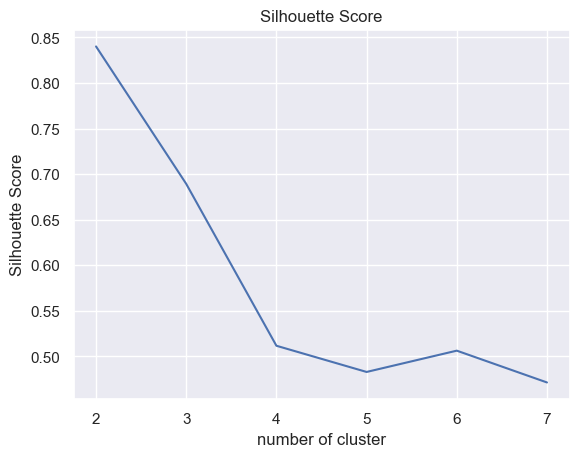

In [9]:
# overall silhouette score
plt.plot(num_clusters, silhouette_score_list)
plt.title("Silhouette Score")
plt.xlabel('number of cluster')
plt.ylabel('Silhouette Score')

### Artificial dataset 5 cluster - case 1

In [20]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=1)

artificial_df = pd.DataFrame(data=X, columns=['Feature 1', 'Feature 2'])

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

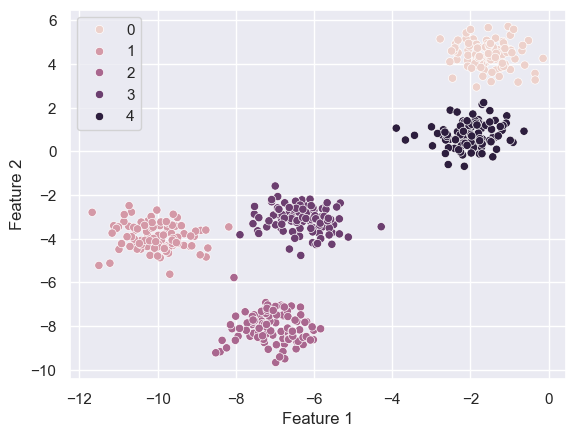

In [21]:
sns.scatterplot(data=artificial_df,
                x='Feature 1',
                y='Feature 2',
                hue=y_true)

c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

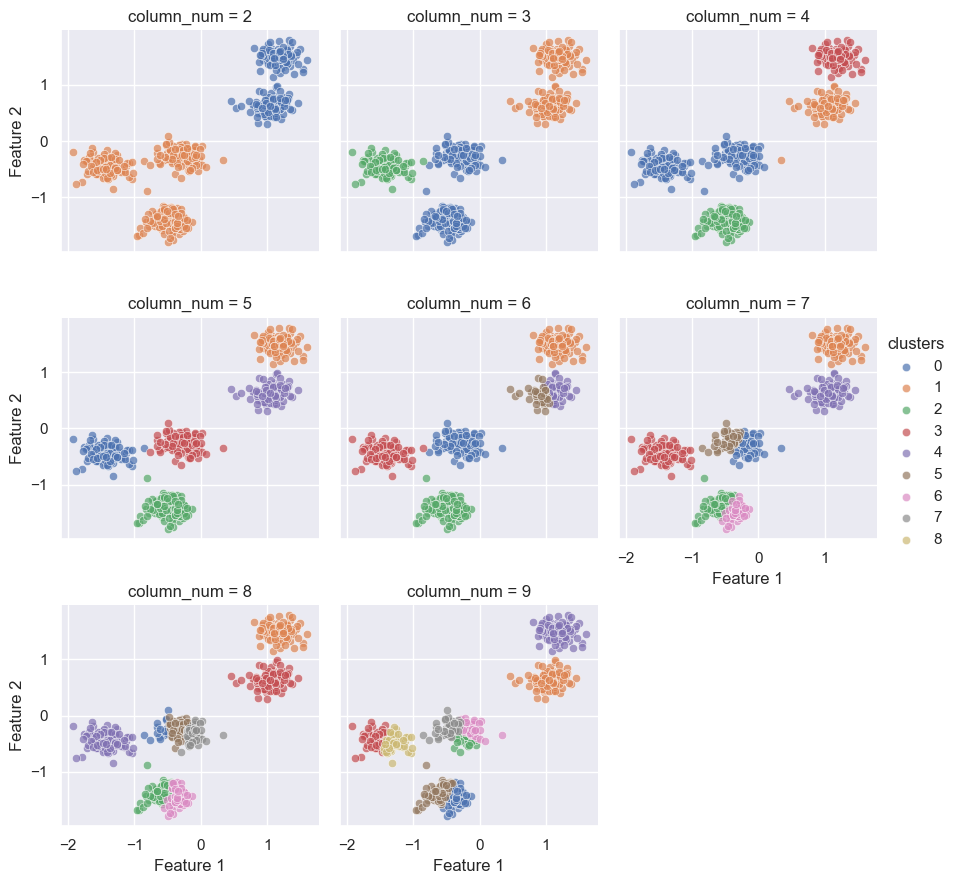

In [22]:
# try out different values of clusters
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

# list to store inertia values
inertia_list = []

# list to store silhouette values
silhouette_scr_list = []

# storage value of cluster data
cluster_data_list = []

# Normalize the dataset
standard_scaler = StandardScaler()
artificial_df = standard_scaler.fit_transform(artificial_df)
artificial_df = pd.DataFrame(data=artificial_df,
                             columns=['Feature 1', 'Feature 2'])

for n_clust in num_clusters:

    kmeans = KMeans(n_clusters=n_clust, n_init='auto')
    kmeans.fit(artificial_df)

    # store value in inertial list
    inertia_list.append(kmeans.inertia_)

    # store silhouette score
    silhouette_scr_list.append(silhouette_score(artificial_df, kmeans.labels_))

    # make cluster data list
    cluster_data = artificial_df.copy()
    cluster_data['column_num'] = n_clust
    cluster_data['clusters'] = kmeans.labels_
    cluster_data_list.append(cluster_data)

# merge all the cluster data in cluster data list
merged_cluster_data = pd.concat(cluster_data_list,
                                axis=0,
                                ignore_index=True)

# Plot the result
g = sns.FacetGrid(data=merged_cluster_data,
                  col='column_num',
                  col_wrap=3,
                  hue='clusters'
)

g.map(sns.scatterplot,
      'Feature 1',
      'Feature 2',
      alpha=.7)

g.add_legend()

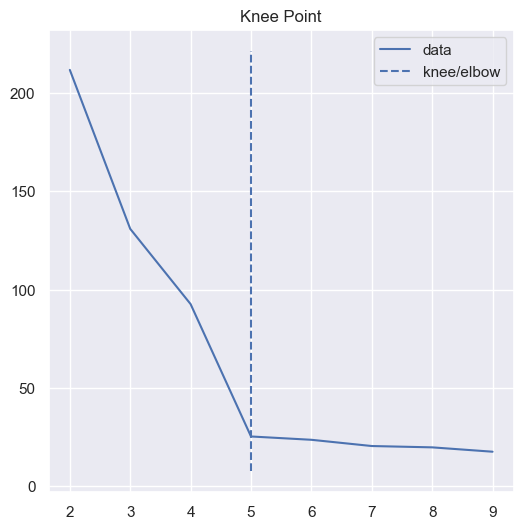

In [23]:
# knee plot
kneedle = KneeLocator(x=num_clusters,
                      y=inertia_list,
                      curve='convex',
                      direction='decreasing')

kneedle.plot_knee()

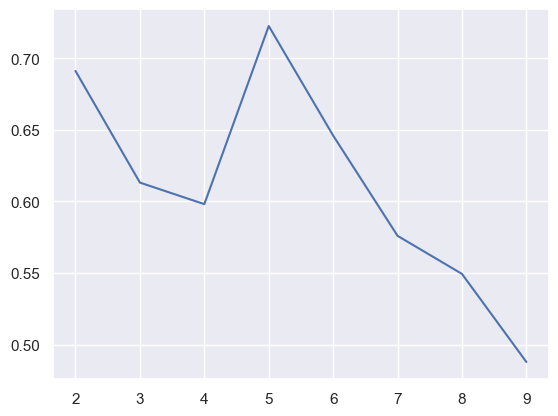

In [24]:
plt.plot(num_clusters, silhouette_scr_list)